# A hybrid method for heart disease diagnosis utilizing feature selection based ensemble classifier model generation

The aim of this study is to replicate the research conducted by Abdollahi and Moghaddam (2022) to gain a deeper understanding of various feature selection methods, specifically ReliefF, FCBF, and genetic algorithms. This research focuses on improving the accuracy of heart disease diagnosis by using an ensemble classification model that incorporates a genetic algorithm and feature selection. The proposed model achieved a high accuracy of 97.57%, demonstrating its potential for effective implementation in healthcare settings.

* Research Paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9081959/
* Dataset: https://archive.ics.uci.edu/dataset/145/statlog+heart

## Importing the libraries

Let's import the necessary libraries to get started.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Data

Now, we read the Heart Dataset into a dataframe.

In [5]:
heart_df = pd.read_csv('data/heart.dat', header=None, sep=" ")
heart_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


We now add the respective column names to the dataframe.

In [7]:
column_names = [
    "age", "sex", "cp_type", "rest_bp", "cholesterol", "fast_bs", "rest_ecg", 
    "max_hr", "ex_angina", "old_peak", "slope",  "num_vessels", "thal",  "hd_presence"  
]

heart_df.columns = column_names
heart_df.head()

,age,sex,cp_type,rest_bp,cholesterol,fast_bs,rest_ecg,max_hr,ex_angina,old_peak,slope,num_vessels,thal,hd_presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [8]:
heart_df.to_csv('data/heart_df.csv', index=False)

*__Variables Table__*

|     Variable Name    |   Role  |     Type    | Description                                                    |
|:--------------------:|:-------:|:-----------:|----------------------------------------------------------------|
| age                  | Feature | Continuous  | demographic - age                                              |
| sex                  | Feature | Binary      | demographic - sex                                              |
| chest-pain           | Feature | Categorical | chest pain type                                                |
| rest-bp              | Feature | Continuous  | resting blood pressure                                         |
| serum-chol           | Feature | Continuous  | serum cholesterol                                              |
| fasting-blood-sugar  | Feature | Binary      | fasting blood sugar &gt; 120 mg/dl                           |
| electrocardiographic | Feature | Categorical | resting electrocardiographic results                         |
| max-heart-rate       | Feature | Continuous  | maximum heart rate achieved                                    |
| angina               | Feature | Binary      | exercise induced anigna                                        |
| oldpeak              | Feature | Continuous  | oldpeak = ST depression induced by exercise relative to rest |
| slope                | Feature | Integer     | the slope of the peak exercise ST segment                     |
| major-vessels        | Feature | Continuous  | number of major vessels (0-3) colored by fluorosopy            |
| thal                 | Feature | Categorical | thal: 3 = normal; 6 = fixed; 7 = reversable defect             |
| heart-disease        | Target  | Binary      | absence = 1 or presence = 2 of heart disease                   |

## Exploratory Data Analysis

We can see below that we have 14 variables and 270 observations. The target variable 'hd_presence' is binary and our features are mixed data types. The numerical variables are of different scale of measurements so it will be necessary to standardize our data.

In [11]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          270 non-null    float64
 1   sex          270 non-null    float64
 2   cp_type      270 non-null    float64
 3   rest_bp      270 non-null    float64
 4   cholesterol  270 non-null    float64
 5   fast_bs      270 non-null    float64
 6   rest_ecg     270 non-null    float64
 7   max_hr       270 non-null    float64
 8   ex_angina    270 non-null    float64
 9   old_peak     270 non-null    float64
 10  slope        270 non-null    float64
 11  num_vessels  270 non-null    float64
 12  thal         270 non-null    float64
 13  hd_presence  270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


In [12]:
heart_df.describe()

,age,sex,cp_type,rest_bp,cholesterol,fast_bs,rest_ecg,max_hr,ex_angina,old_peak,slope,num_vessels,thal,hd_presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


## Numerical Variables

Some numerical variables exhibit significant outliers. However, these outliers appear to be natural variations in the distribution, as evidenced by the histogram below. Since these are not due to measurement errors, we will retain them. Removing a genuine outlier, which reflects the actual condition of a patient, could compromise the integrity of our models.

In [14]:
num_cols = ['age', 'rest_bp', 'cholesterol', 'max_hr', 'old_peak', 'num_vessels']

C:\Users\patri\AppData\Local\Temp\ipykernel_19756\3329924755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=heart_df[col], ax=axes[i], palette='cool')
C:\Users\patri\AppData\Local\Temp\ipykernel_19756\3329924755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=heart_df[col], ax=axes[i], palette='cool')
C:\Users\patri\AppData\Local\Temp\ipykernel_19756\3329924755.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=heart_df[col], ax=axes[i], palette='cool')
C:\Users\patri\AppData\Local\Temp\ipykernel_19756\3329924755.py:6: Future

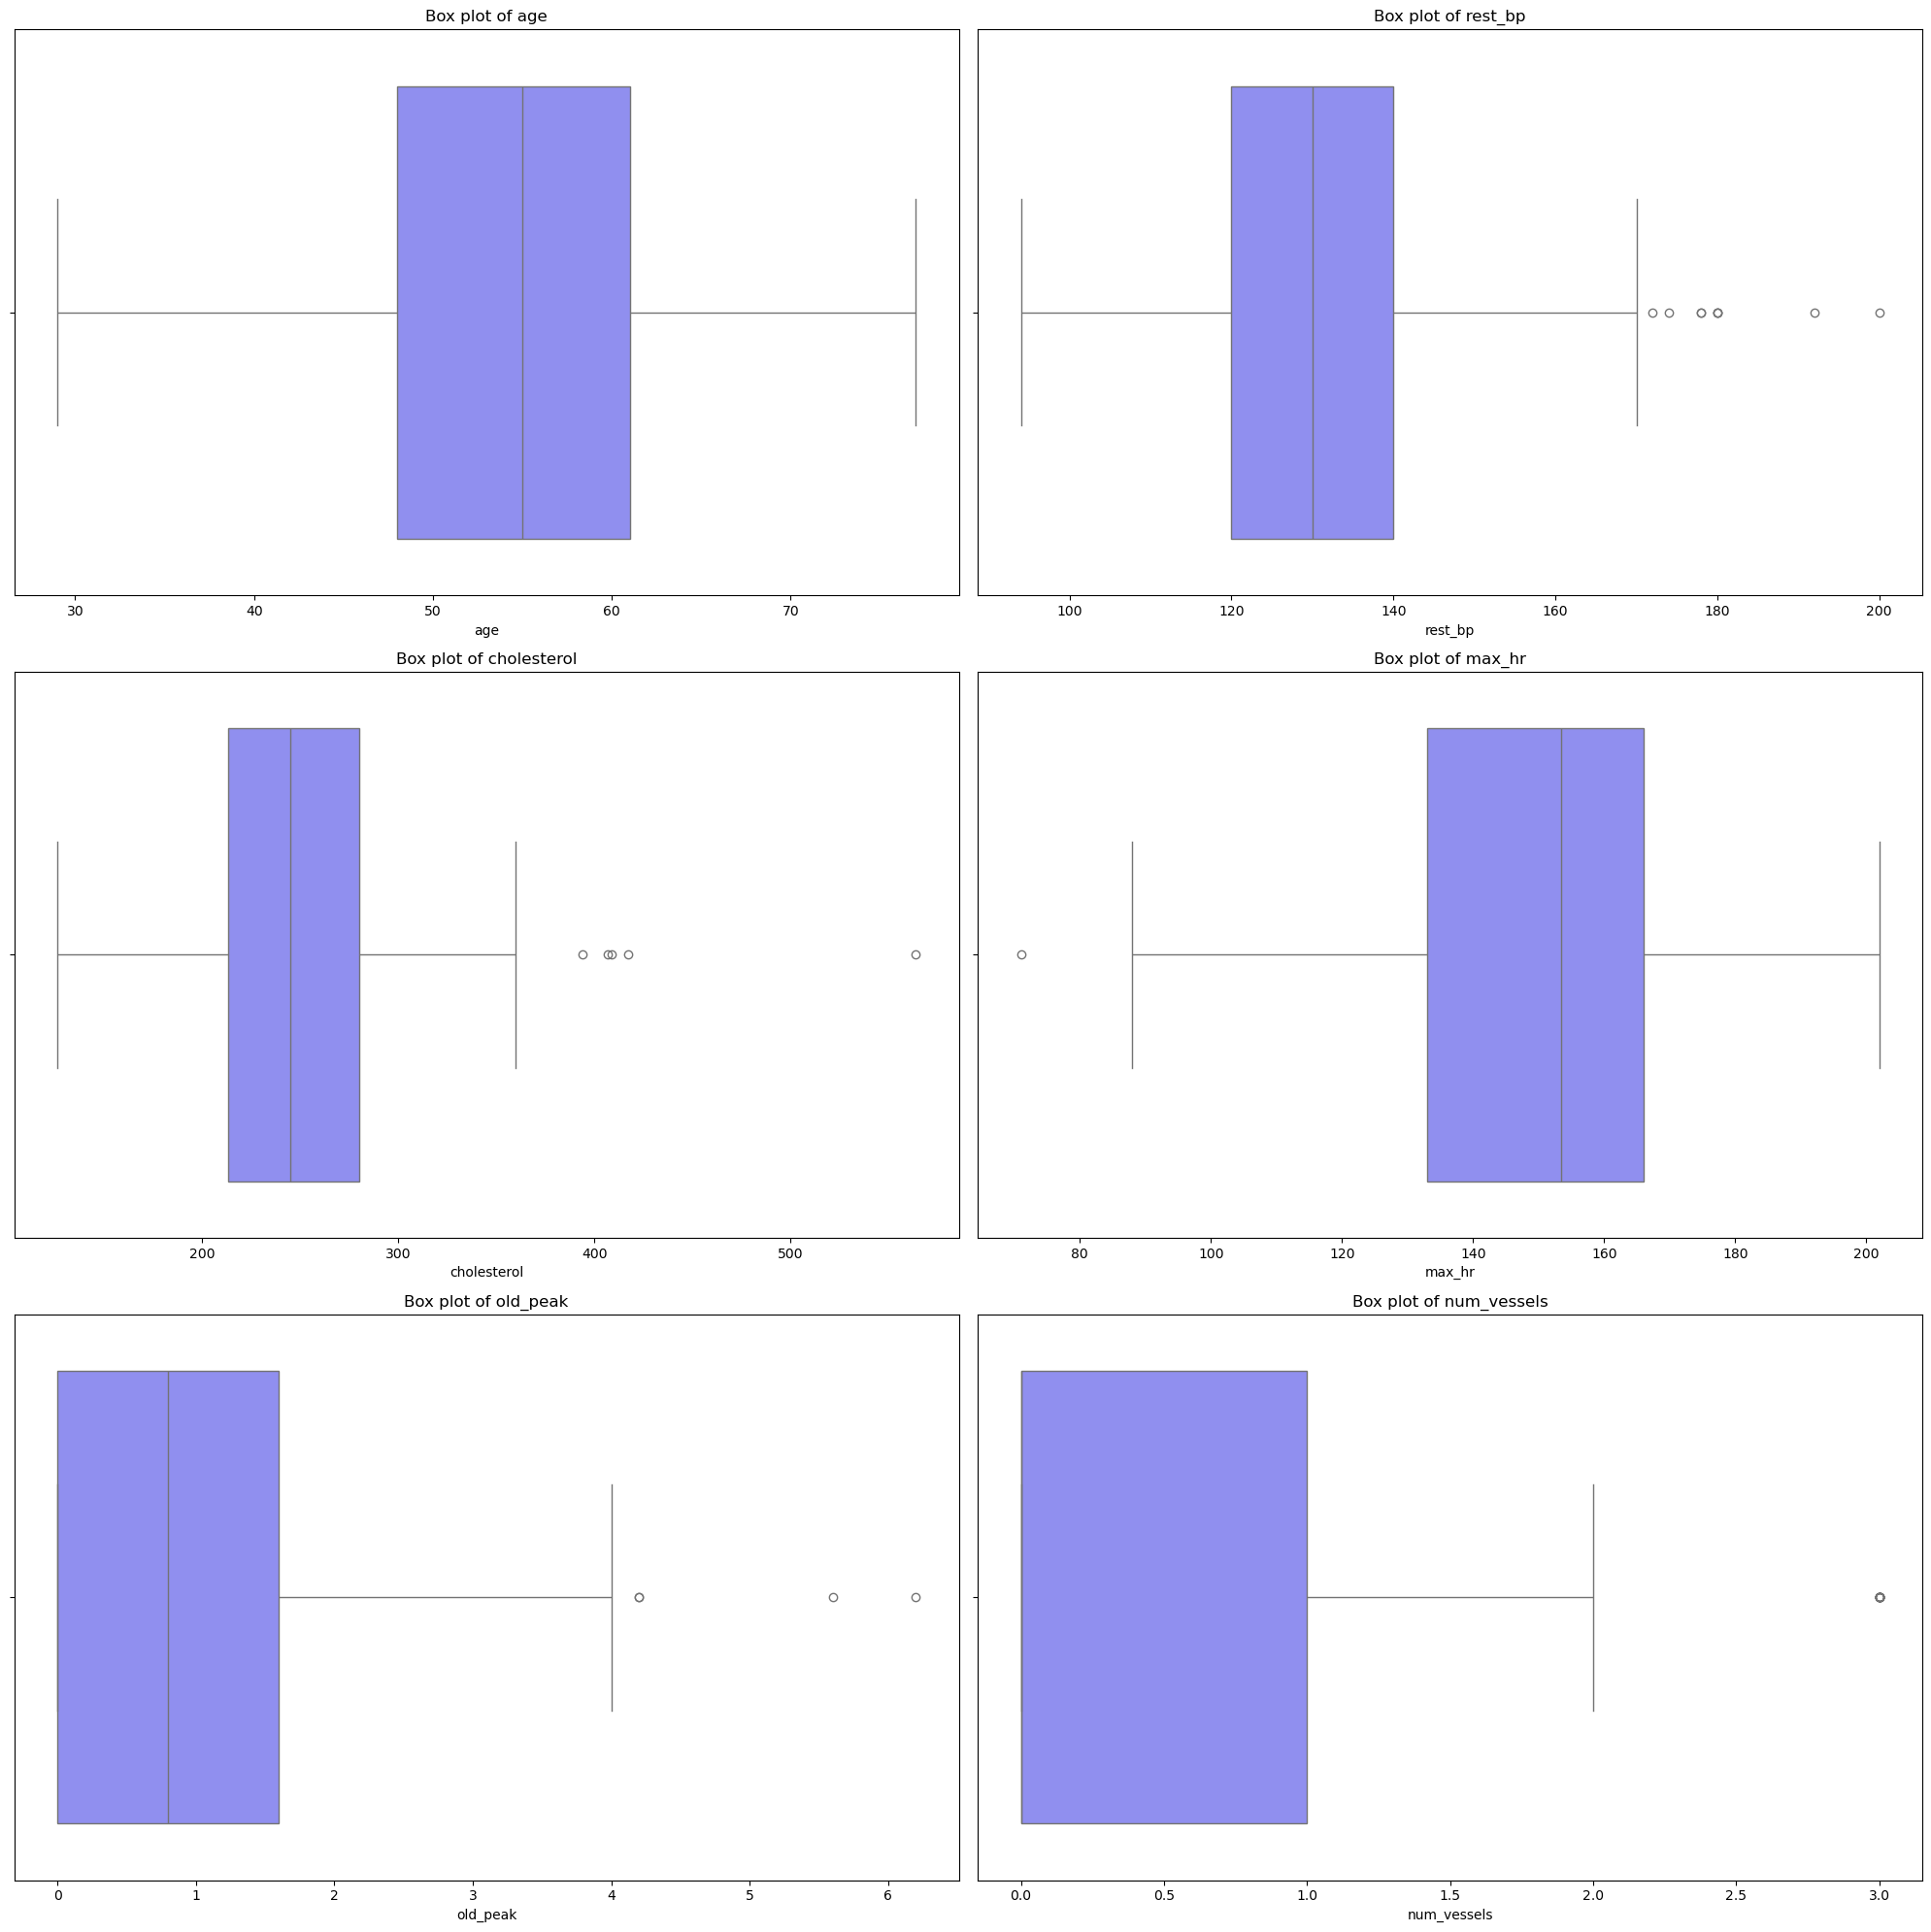

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(20, 20))

axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=heart_df[col], ax=axes[i], palette='cool')
    axes[i].set_title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

There is a moderate negative correlation between age and maximum heart rate, suggesting that older individuals tend to have lower maximum heart rates. Age also shows a moderate positive correlation with the number of major vessels. Maximum heart rate and old peak have a moderate negative correlation. Other variable pairs show weak to moderate correlations.

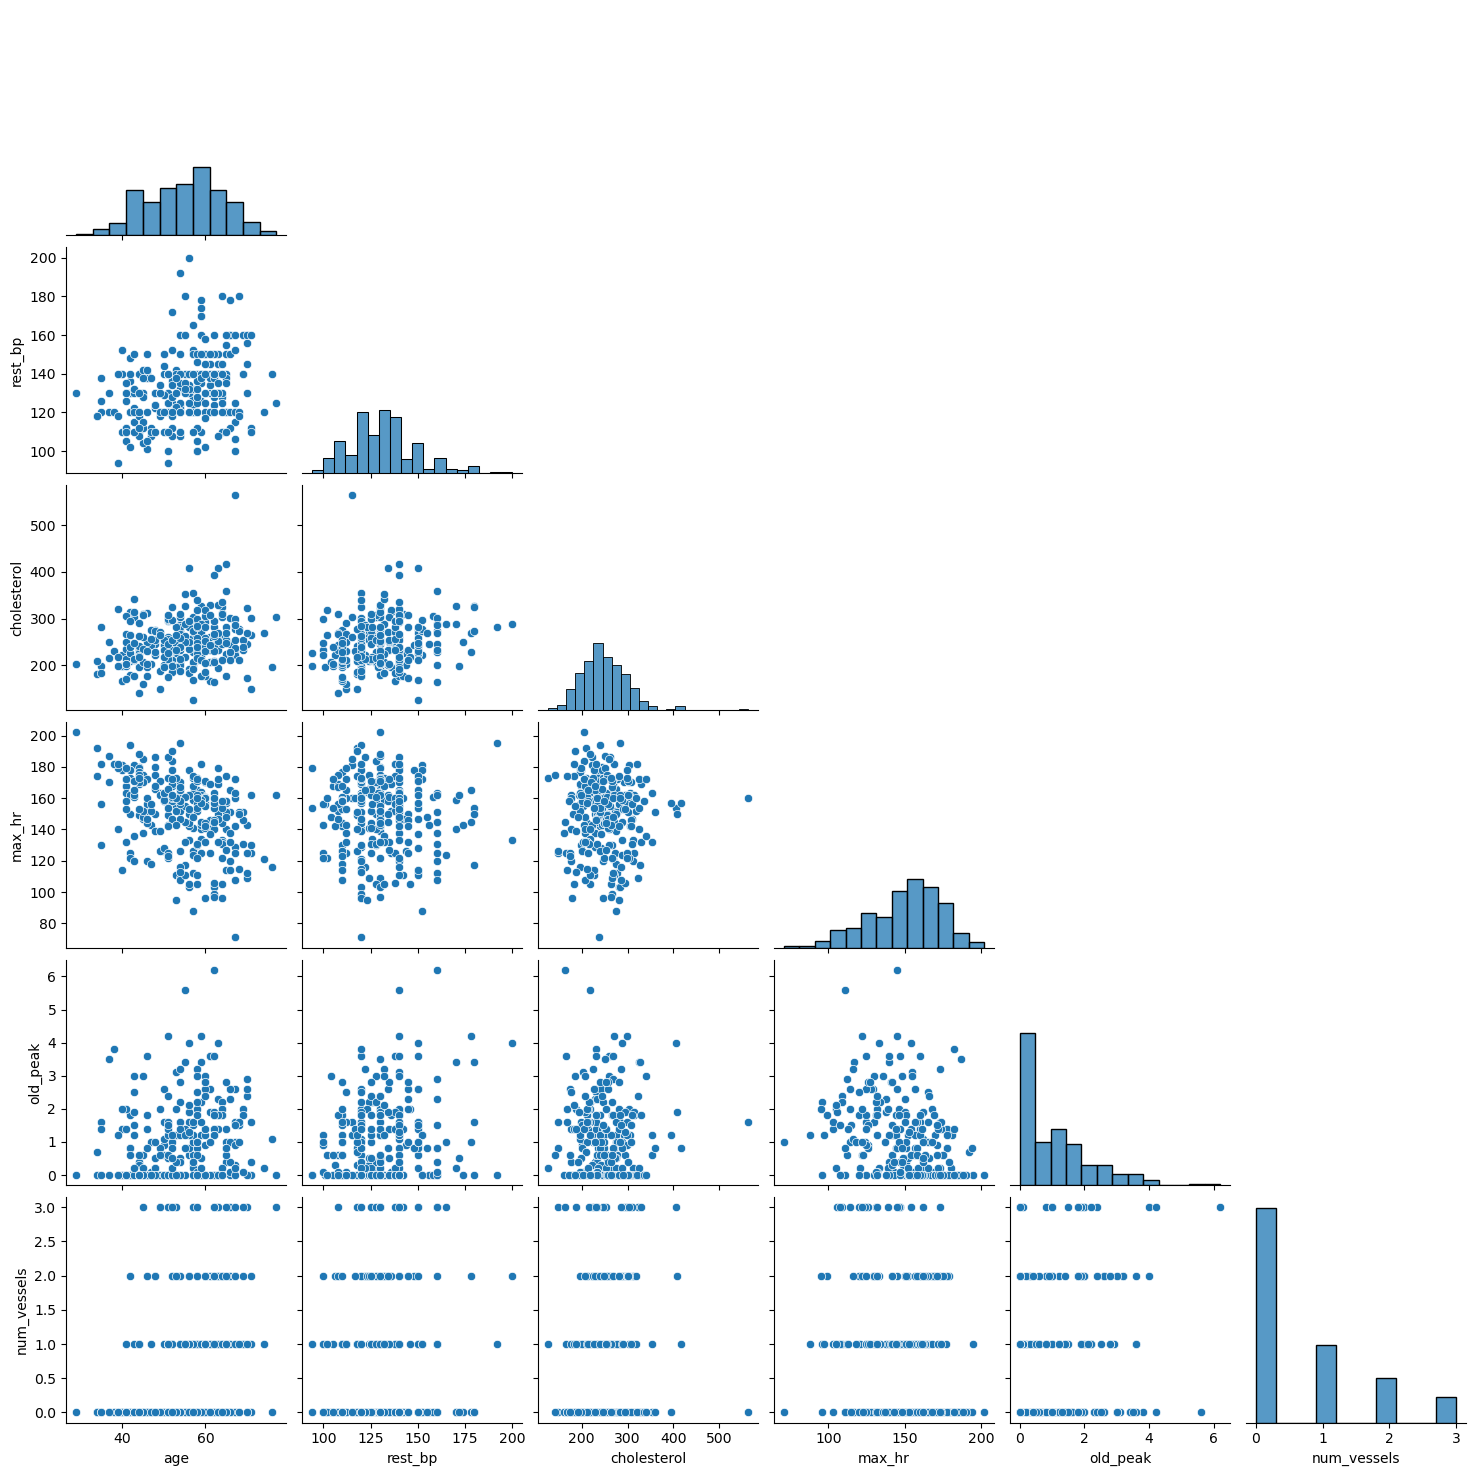

In [17]:
sns.pairplot(heart_df[num_cols], diag_kind='hist', corner=True)

<Axes: >

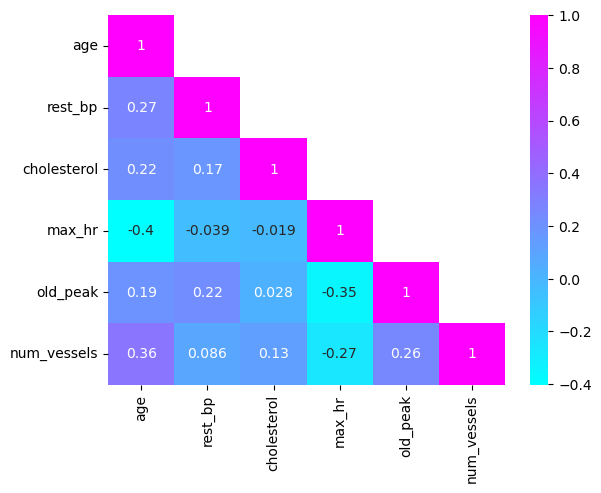

In [18]:
corr = heart_df[num_cols].corr()
mask=np.triu(np.ones_like(corr, dtype=bool))
np.fill_diagonal(mask, False)

sns.heatmap(corr, annot=True, cmap='cool', mask=mask)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_with_const = add_constant(heart_df[num_cols])

vif = pd.DataFrame()
vif["feature"] = df_with_const.columns
vif["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

vif

,feature,VIF
0,const,166.641262
1,age,1.443769
2,rest_bp,1.158205
3,cholesterol,1.076963
4,max_hr,1.354683
5,old_peak,1.236772
6,num_vessels,1.211177


## Categorical Variables

The dataset displays notable imbalances across several categorical features. However, t
the distribution of our target variable is almost equal between the two classes, indicating an even split in the presence of heart disease. 

In [21]:
cat_cols = ['sex', 'cp_type', 'fast_bs', 'rest_ecg', 'ex_angina', 'slope', 'thal', 'hd_presence']

C:\Users\patri\AppData\Local\Temp\ipykernel_19756\1935269412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=heart_df[col], ax=axes[i], palette='cool')
C:\Users\patri\AppData\Local\Temp\ipykernel_19756\1935269412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=heart_df[col], ax=axes[i], palette='cool')
C:\Users\patri\AppData\Local\Temp\ipykernel_19756\1935269412.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=heart_df[col], ax=axes[i], palette='cool')
C:\Users\patri\AppData\Local\Temp\ipykernel_19756\1935269412.py:6: 

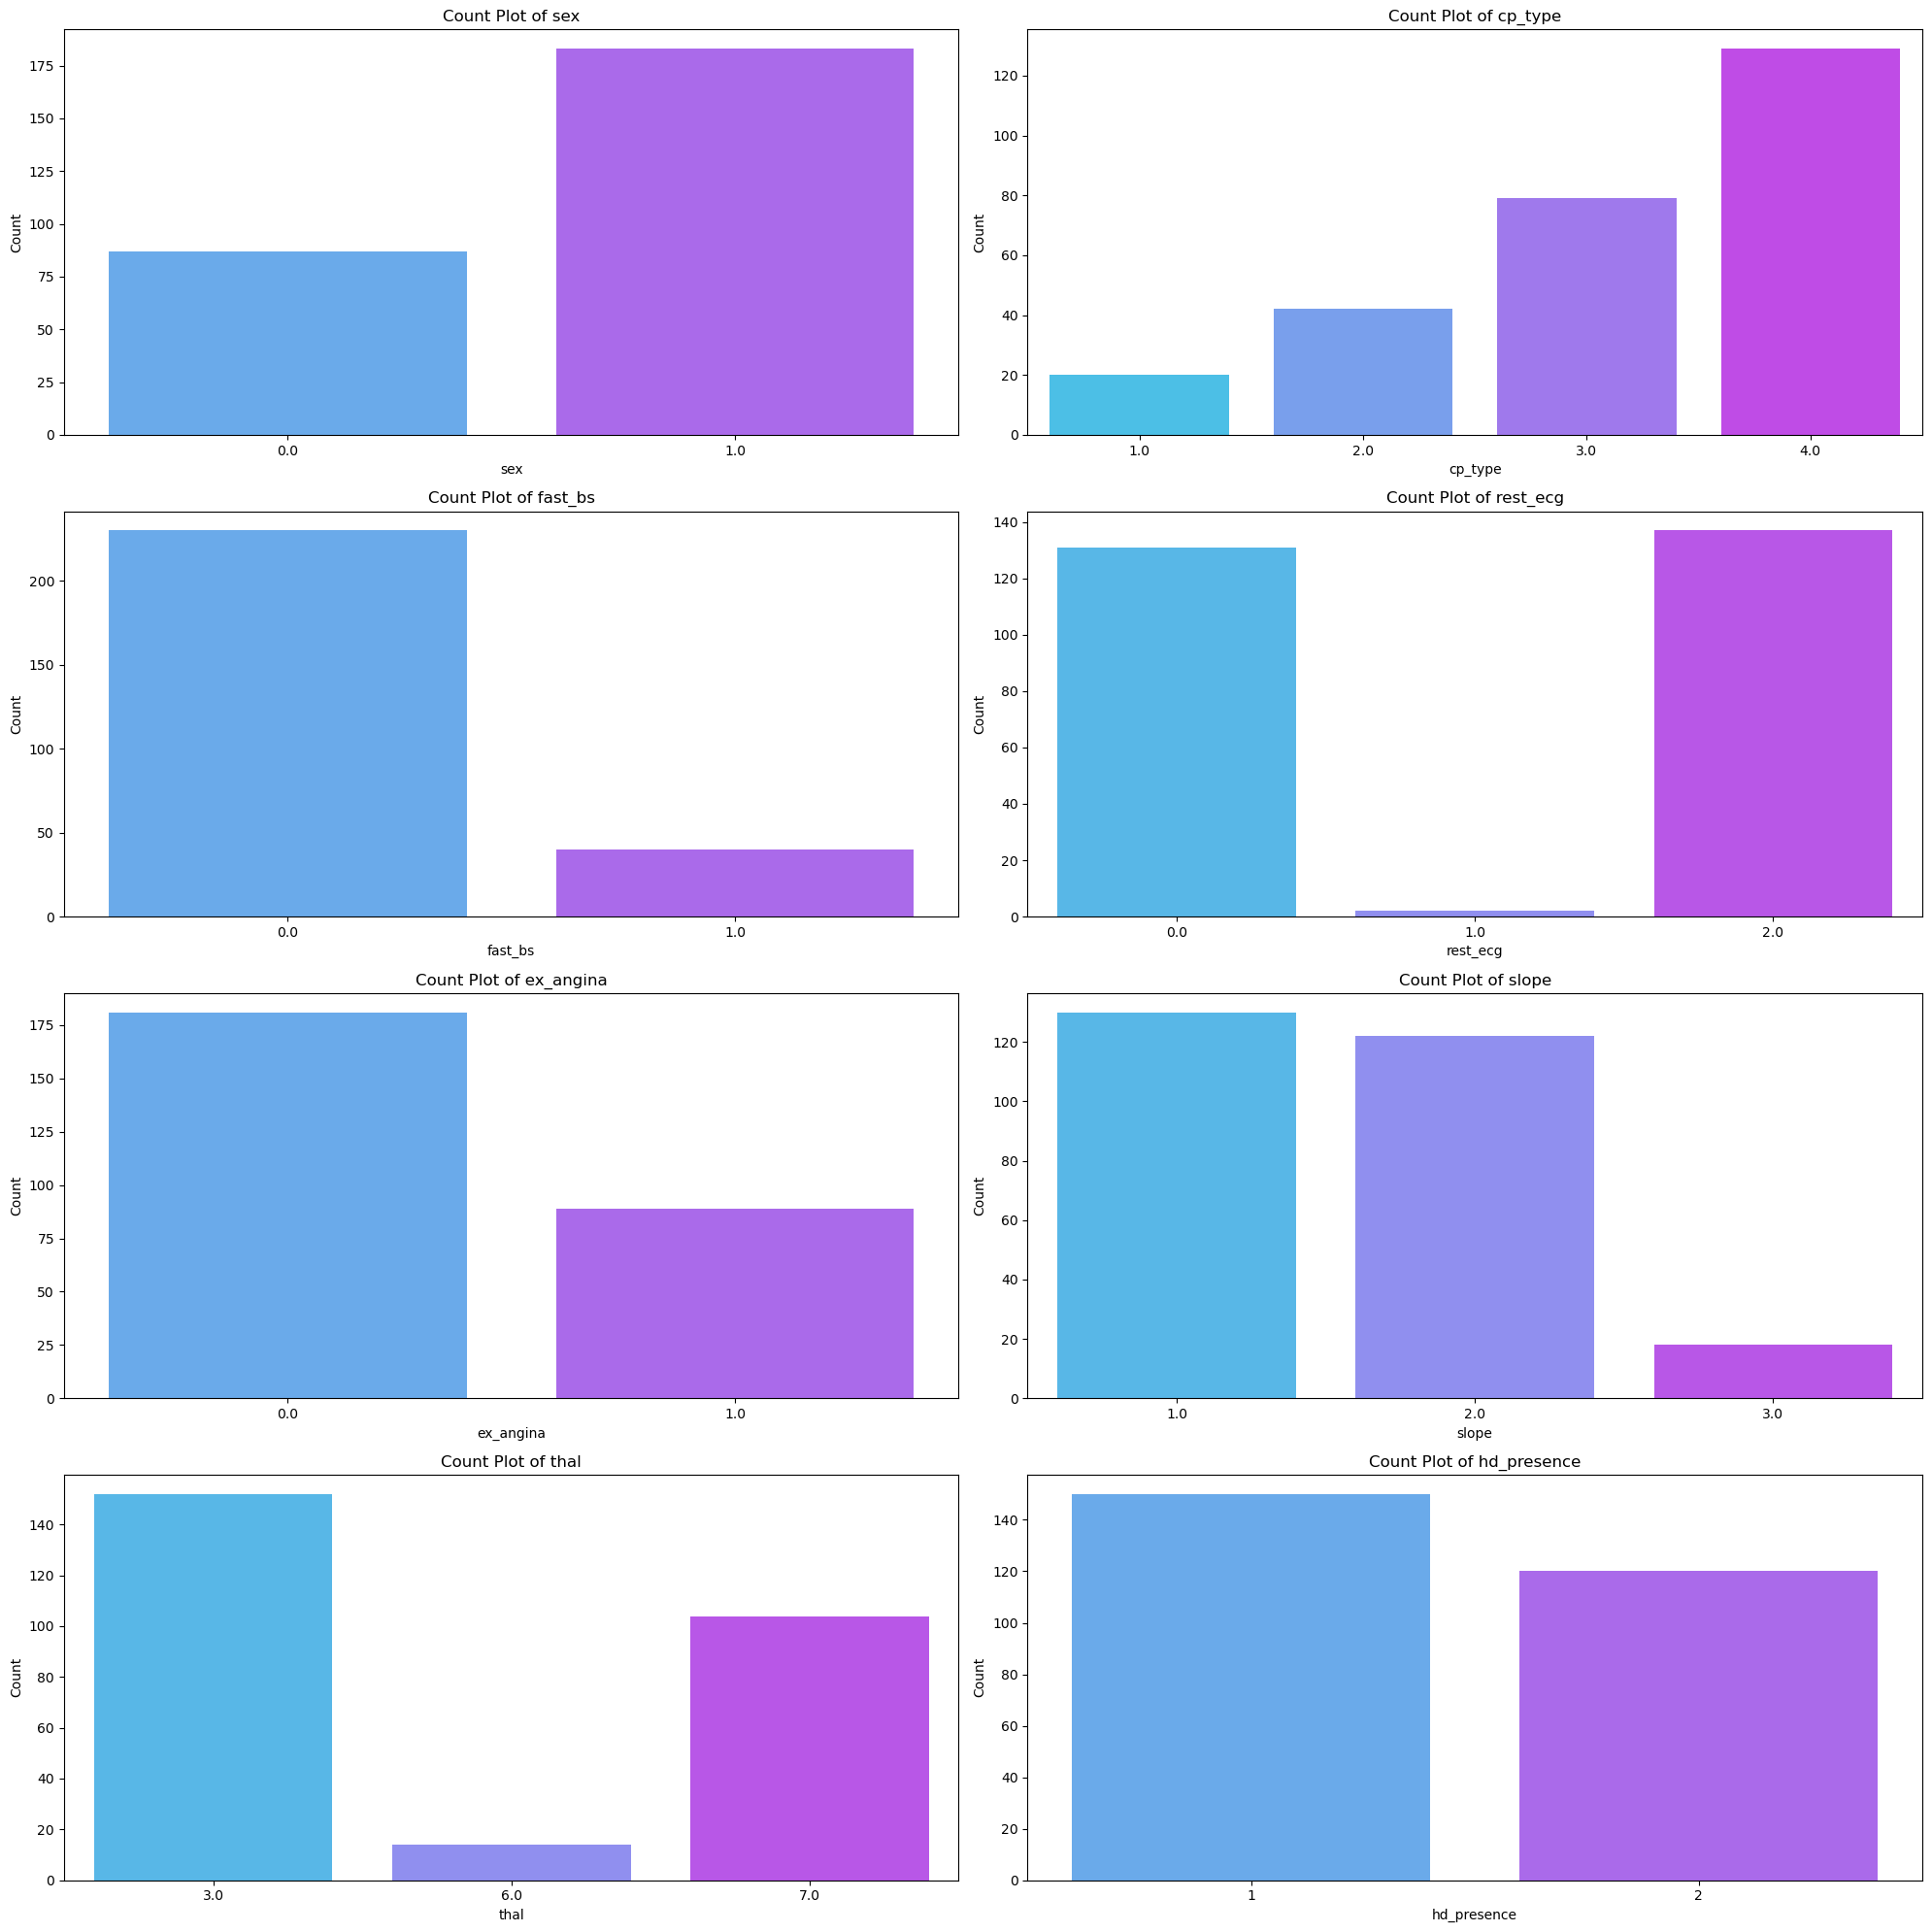

In [22]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=heart_df[col], ax=axes[i], palette='cool')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

## Missing Variables

We see below that there are no missing data.

In [24]:
missing_data = heart_df.isnull().sum().reset_index()
missing_data.columns = ['Column', 'Missing Count']
missing_data['Missing Percentage'] = (missing_data['Missing Count'] / len(heart_df)) * 100
missing_data

,Column,Missing Count,Missing Percentage
0,age,0,0.0
1,sex,0,0.0
2,cp_type,0,0.0
3,rest_bp,0,0.0
4,cholesterol,0,0.0
5,fast_bs,0,0.0
6,rest_ecg,0,0.0
7,max_hr,0,0.0
8,ex_angina,0,0.0
9,old_peak,0,0.0


## ReliefF Feature Ranking

ReliefF is a filtering feature selection algorithm that was developed as an extension of the Relief algorithm to handle multi-class problems effectively. It operates by selecting features based on their ability to distinguish between different classes, utilizing nearest neighbor samples to weigh feature importance. The method involves calculating the difference between the within-class and between-class distances for various features, updating a feature weighting vector accordingly (Wang et al., 2016).

In [26]:
pip install skrebate

Note: you may need to restart the kernel to use updated packages.


In [27]:
y = heart_df['hd_presence']
X = heart_df.drop('hd_presence', axis=1)

In [28]:
from skrebate import ReliefF

reliefF = ReliefF(verbose=True, n_jobs=-1, n_features_to_select=len(X.columns), discrete_threshold=2)

reliefF.fit(X.to_numpy(), y.to_numpy())
feature_importance = reliefF.feature_importances_

feature_rank_df = pd.DataFrame({
    'Feature': X.columns,
    'feature_importance': feature_importance,
})

feature_rank_df = feature_rank_df.sort_values(by='feature_importance', ascending=False)
feature_rank_df

Created distance array in 0.0038874149322509766 seconds.
Feature scoring under way ...
Completed scoring in 2.209881544113159 seconds.


,Feature,feature_importance
12,thal,0.281435
11,num_vessels,0.177778
8,ex_angina,0.175222
2,cp_type,0.157889
10,slope,0.139037
9,old_peak,0.108556
7,max_hr,0.101460
1,sex,0.073778
0,age,0.036615
6,rest_ecg,0.020259


## Fast Correlation-Based Filter (FCBF) Feature Ranking

Fast Correlation-Based Filter (FCBF) is a feature selection algorithm designed to handle high-dimensional data efficiently by identifying both relevant and redundant features. It employs the symmetrical uncertainty (SU) measure to assess the correlation between features and the class label. The FCBF algorithm operates in two main phases: the first phase selects relevant features based on a predefined SU threshold, and the second phase eliminates redundant features among the selected ones. This two-step process allows FCBF to significantly reduce dimensionality while maintaining or even improving the classification accuracy (Yu & Liu, n.d.).

In [30]:
pip install fcbf

Note: you may need to restart the kernel to use updated packages.


In [31]:
from fcbf import fcbf

relevant_features, irrelevant_features, correlations = fcbf(X, y, base=2)
correlations_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

print('Relevant Features:', relevant_features)
print('Irrelevant Features:', irrelevant_features)

Relevant Features: ['thal', 'cp_type', 'num_vessels', 'ex_angina', 'slope', 'rest_ecg']
Irrelevant Features: ['fast_bs', 'age', 'rest_bp', 'sex', 'old_peak', 'max_hr', 'cholesterol']


In [32]:
correlations_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,thal,0.188802
12,cholesterol,0.152974
1,cp_type,0.141601
2,num_vessels,0.137197
3,ex_angina,0.136349
11,max_hr,0.099243
4,slope,0.097627
10,old_peak,0.094246
9,sex,0.070496
8,rest_bp,0.051563


In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_selected = heart_df.drop(["hd_presence", "age", "slope", "old_peak", "num_vessels"], axis=1)
y_selected = heart_df["hd_presence"]

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

In [77]:
classifiers = [
    ('DecisionTree', DecisionTreeClassifier(), {'max_depth': [5, 10, 15]}),
    ('LogisticRegression', LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]})
]

def perform_grid_search(X_train, y_train, title):
    print(title)
    for tag, model, params in classifiers:
        grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
        
        start_time = time.time()
        grid.fit(X_train, y_train)
        end_time = time.time()
        
        elapsed_t = end_time - start_time
        
        print("Classifier: {}".format(tag))
        print("Best score: {:.4f}".format(grid.best_score_))
        print("Elapsed Time: {:.4f} seconds\n".format(elapsed_t))

In [83]:
perform_grid_search(X_train, y_train, "Base Model Grid Search")

Base Model Grid Search
Classifier: DecisionTree
Best score: 0.6762
Elapsed Time: 0.0573 seconds



C:\Users\patri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\patri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Classifier: LogisticRegression
Best score: 0.8244
Elapsed Time: 1.1830 seconds



C:\Users\patri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\patri\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [87]:
perform_grid_search(X_train_selected, y_train_selected, "Selected Features Model Grid Search")

Selected Features Model Grid Search
Classifier: DecisionTree
Best score: 0.6847
Elapsed Time: 0.0587 seconds

Classifier: LogisticRegression
Best score: 0.8008
Elapsed Time: 0.5866 seconds



## Genetic Algorithm

Genetic algorithm is an optimization technique inspired by the process of natural selection, simulating the evolutionary principles of reproduction, mutation, and selection to find the best solution to a problem. The key components of genetic algorithms include a population of candidate solutions encoded as chromosomes, a fitness function to evaluate these solutions, selection mechanisms to choose the fittest individuals, crossover methods to combine selected individuals to produce offspring, and mutation processes to introduce variations (Carr, 2014). 

In [ ]:
import numpy as np
import pandas as pd
from random import randint

import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score
from statistics import median

warnings.filterwarnings("ignore")

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(n_jobs=-1),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(kernel='linear'),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1, max_depth=10),
    'K-Nearest Neighbors': KNeighborsClassifier(n_jobs=-1),
}

In [ ]:
def population_init(size, n_feat):
    population = []

    for i in range(size):
        chromosome = np.ones(n_feat, dtype='bool')
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)

    return population


def fitness_score(population, model, X, y):
    scores = []

    for chromosome in population:
        cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
        accuracy_scores = cross_val_score(model, X.iloc[:, chromosome], y, scoring='accuracy', cv=cv)
        median_score = median(accuracy_scores)
        scores.append(median_score)

    scores, population = np.array(scores), np.array(population)
    indices = np.argsort(scores)

    return list(scores[indices][::-1]), list(population[indices, :][::-1])


def selection(pop_after_fit, selection_prop=0.5):
    n_select = int(len(pop_after_fit) * selection_prop)
    population_nextgen = pop_after_fit[:n_select]

    return population_nextgen


def crossover(pop_after_sel, size, crossover_prop=0.5):
    # pop_nextgen = pop_after_sel
    # 
    # for i in range(0, len(pop_after_sel), 2):
    #     new_par = []
    #     child_1, child_2 = pop_nextgen[i], pop_nextgen[i + 1]
    # 
    #     split_index = int(len(child_1) * crossover_prop)
    #     new_par = np.concatenate((child_1[:split_index], child_2[split_index:]))
    # 
    #     pop_nextgen.append(new_par)
    # 
    # return pop_nextgen

    pop_nextgen = []

    while len(pop_nextgen) < size - 2:
        parent1 = pop_after_sel[randint(0, len(pop_after_sel) - 1)]
        parent2 = pop_after_sel[randint(0, len(pop_after_sel) - 1)]

        split_index = int(len(parent1) * crossover_prop)

        child1 = np.concatenate((parent1[:split_index], parent2[split_index:]))
        child2 = np.concatenate((parent2[:split_index], parent1[split_index:]))

        pop_nextgen.append(child1)
        pop_nextgen.append(child2)

    return pop_nextgen[:size - 2]


def mutation(pop_after_cross, n_feat, mutation_rate=0.3):
    mutation_range = int(mutation_rate * n_feat)
    pop_next_gen = []

    for n in range(0, len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_position = []

        for i in range(0, mutation_range):
            pos = randint(0, n_feat - 1)
            rand_position.append(pos)

        for j in rand_position:
            chromo[j] = not chromo[j]

        pop_next_gen.append(chromo)

    return pop_next_gen


def generations(X, y, model_name, model, size, n_feat, selection_prop=0.5, crossover_prop=0.5, mutation_rate=0.3,
                n_elites=2, n_gen=5, stall_gen=2):
    best_chromo = []
    best_score = []
    consecutive_same_chromo = 0
    last_best_chromo = None

    population_nextgen = population_init(size, n_feat)

    print('\nClassifier Running:', model_name)

    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(
            population=population_nextgen,
            model=model,
            X=X,
            y=y,
        )

        print('Best score in generation', i + 1, ':', scores[:1], pop_after_fit[:1])

        if last_best_chromo is not None and np.array_equal(last_best_chromo, pop_after_fit[0]):
            consecutive_same_chromo += 1
        else:
            consecutive_same_chromo = 0

        last_best_chromo = pop_after_fit[0]

        if consecutive_same_chromo >= stall_gen:
            print(
                f'Stopping early at generation {i + 1} because the best chromosome has not changed for {stall_gen} generations.')
            break

        pop_after_sel = selection(pop_after_fit, selection_prop=selection_prop)
        pop_after_cross = crossover(pop_after_sel, size, crossover_prop=crossover_prop)
        population_nextgen = mutation(pop_after_cross, n_feat, mutation_rate=mutation_rate)
        population_nextgen.extend(pop_after_fit[:n_elites])

        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])

    return best_chromo, best_score

In [ ]:
data_bc = pd.read_csv("heart.dat", header=None, sep=" ")

column_names = [
    "age",
    "sex",
    "cp_type",  # chest pain type
    "rest_bp",  # resting blood pressure
    "cholesterol",  # serum cholesterol in mg/dl
    "fast_bs",  # fasting blood sugar > 120 mg/dl
    "rest_ecg",  # resting electrocardiograph results
    "max_hr",  # maximum heart rate achieved
    "ex_angina",  # exercise induced angina
    "old_peak",  # old peak = ST depression induced by exercise relative to rest
    "slope",  # the slope of the peak exercise ST segment
    "num_vessels",  # number of major vessels colored by fluoroscopy
    "thal",  # thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
    "hd_presence"  # heart disease presence
]

data_bc.columns = column_names
data_bc.head()

In [ ]:
label_bc = data_bc["hd_presence"]
# label_bc = np.where(label_bc == 'M', 1, 0)
data_bc.drop(["hd_presence"], axis=1, inplace=True)

print("Heart Disease dataset:\n", data_bc.shape[0], "Records\n", data_bc.shape[1], "Features")

In [ ]:
display(data_bc.head())
print("All the features in this dataset have continuous values")

In [ ]:
score1 = acc_score(data_bc, label_bc)
score1

In [ ]:
logmodel = RandomForestClassifier(n_estimators=200, random_state=0)

X_train, X_test, Y_train, Y_test = split(data_bc, label_bc)

chromo_df_bc, score_bc = generations(data_bc, label_bc, size=80, n_feat=data_bc.shape[1], n_parents=64,
                                     mutation_rate=0.20, n_gen=5,
                                     X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

In [ ]:
plot(score_bc, 0.9, 1.0, c="gold")

## References

Wang, Z., Zhang, Y., Chen, Z., Yang, H., Sun, Y., Kang, J., Yang, Y., & Liang, X. (2016). Application of ReliefF algorithm to selecting feature sets for classification of high resolution remote sensing image. https://doi.org/10.1109/igarss.2016.7729190
Yu, L., & Liu, H. (n.d.). Feature Selection for High-Dimensional Data: A Fast Correlation-Based Filter Solution. https://cdn.aaai.org/ICML/2003/ICML03-111.pdf

Carr, J. (2014). An Introduction to Genetic Algorithms. https://www.whitman.edu/Documents/Academics/Mathematics/2014/carrjk.pdf
‌